Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **6. studenog 2022. u 23:59h**

------------------------------

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
#seven_y = np.array([1,1,1,1,-1,-1,-1])

Accuracy score for dataset seven is: 1.0


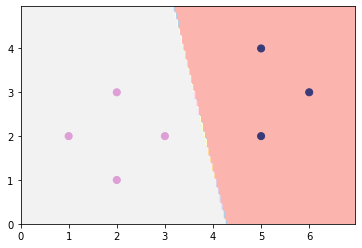

In [5]:
# Vaš kôd ovdje
ridge_classifier = RidgeClassifier().fit(seven_X, seven_y)
pred_seven_y = ridge_classifier.predict(seven_X)
print("Accuracy score for dataset seven is: " + str(accuracy_score(seven_y, pred_seven_y)))
plot_2d_clf_problem(seven_X, seven_y, h=lambda x : ridge_classifier.predict(x))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Accuracy score for dataset seven is: 1.0


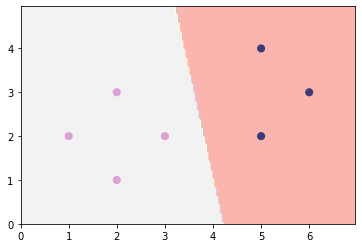

In [6]:
# Vaš kôd ovdje
linear_regression = LinearRegression().fit(seven_X, seven_y)
pred_seven_y_lr = linear_regression.predict(seven_X)
print("Accuracy score for dataset seven is: " + str(accuracy_score(seven_y, pred_seven_y_lr >= 0.5)))
plot_2d_clf_problem(seven_X, seven_y, h=lambda x : linear_regression.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Accuracy score for dataset outlier is: 0.875


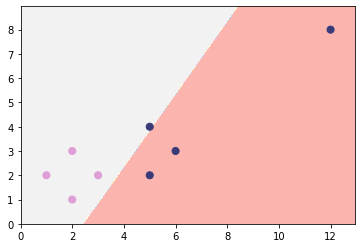

In [8]:
# Vaš kôd ovdje
ridge_classifier = RidgeClassifier().fit(outlier_X, outlier_y)
pred_outlier_y = ridge_classifier.predict(outlier_X)
print("Accuracy score for dataset outlier is: " + str(accuracy_score(outlier_y, pred_outlier_y)))
plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x : ridge_classifier.predict(x))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Accuracy score for dataset unsep is: 0.875


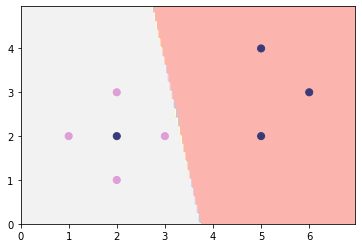

In [10]:
# Vaš kôd ovdje
ridge_classifier = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)
pred_unsep_y = ridge_classifier.predict(unsep_X)
print("Accuracy score for dataset unsep is: " + str(accuracy_score(unsep_y, pred_unsep_y)))
plot_2d_clf_problem(unsep_X, unsep_y, h=lambda x : ridge_classifier.predict(x))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

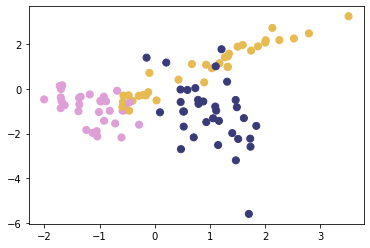

In [11]:
from sklearn.datasets import make_classification
# Vaš kôd ovdje
my_X, my_y = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
plot_2d_clf_problem(my_X, my_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Accuracy score for h1 is: 0.89


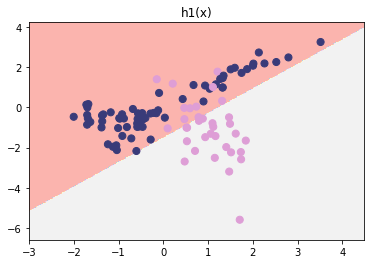

Accuracy score for h2 is: 0.82


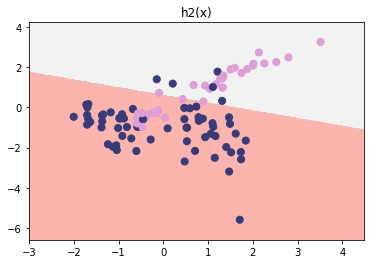

Accuracy score for h3 is: 0.93


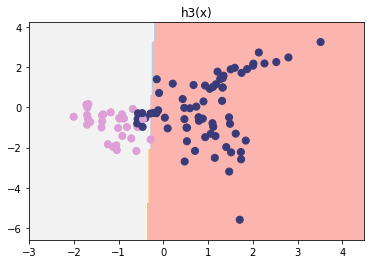

Accuracy score for h is: 0.81


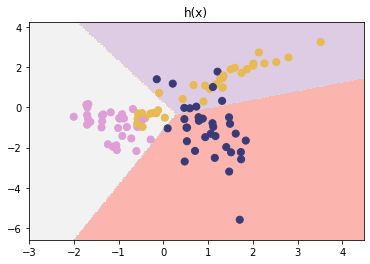

Accuracy score for h is: 0.81


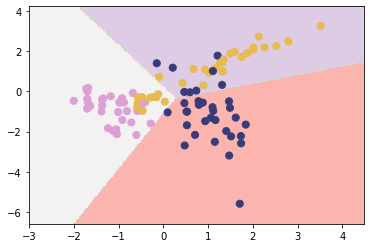

In [12]:
# Vaš kôd ovdje
def my_yi(class_int):
    arr = []
    for yi in my_y:
        if yi == class_int:
            arr.append(1)
        else:
            arr.append(0)
    return np.array(arr)


#print(my_y) - my_y has 3 classes, with labels 0, 1 and 2
my_y1 = my_yi(0)
my_y2 = my_yi(1)
my_y3 = my_yi(2)

h1 = LinearRegression().fit(my_X, my_y1)
pred_y_h1 = h1.predict(my_X)
print("Accuracy score for h1 is: " + str(accuracy_score(my_y1, pred_y_h1 >= 0.5)))
plot_2d_clf_problem(my_X, my_y1, h=lambda x : h1.predict(x) >= 0.5)
plt.title("h1(x)")
plt.show()

h2 = LinearRegression().fit(my_X, my_y2)
pred_y_h2 = h2.predict(my_X)
print("Accuracy score for h2 is: " + str(accuracy_score(my_y2, pred_y_h2 >= 0.5)))
plot_2d_clf_problem(my_X, my_y2, h=lambda x : h2.predict(x) >= 0.5)
plt.title("h2(x)")
plt.show()

h3 = LinearRegression().fit(my_X, my_y3)
pred_y_h3 = h3.predict(my_X)
print("Accuracy score for h3 is: " + str(accuracy_score(my_y3, pred_y_h3 >= 0.5)))
plot_2d_clf_problem(my_X, my_y3, h=lambda x : h3.predict(x) >= 0.5)
plt.title("h3(x)")
plt.show()

#custom predict function
def predict(x):
    pred_y_h1 = h1.predict(x)
    pred_y_h2 = h2.predict(x)
    pred_y_h3 = h3.predict(x)
    return np.array([np.argmax([pred_y_h1[i], pred_y_h2[i], pred_y_h3[i]]) for i in range(len(x))])

print("Accuracy score for h is: " + str(accuracy_score(my_y, predict(my_X))))
plot_2d_clf_problem(my_X, my_y, h=lambda x : predict(x))
plt.title("h(x)")
plt.show()

ridge_classifier = RidgeClassifier(alpha=0).fit(my_X, my_y)
pred_my_y = ridge_classifier.predict(my_X)
print("Accuracy score for h is: " + str(accuracy_score(my_y, pred_my_y)))
plot_2d_clf_problem(my_X, my_y, h=lambda x : ridge_classifier.predict(x))


### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

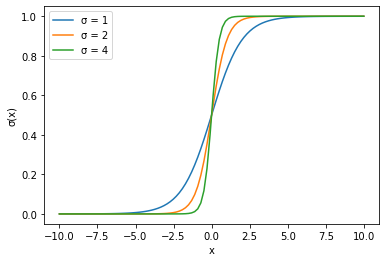

In [13]:
# Vaš kôd ovdje
alphas = [1,2,4]
def sigm(x,alpha=1):
    return 1 / (1 + exp(-alpha*x))

x = np.linspace(-10,10,100)

for alpha in alphas:   
    plt.plot(x,sigm(x, alpha), label="\u03C3 = " + str(alpha))
plt.xlabel("x")
plt.ylabel("\u03C3(x)")
plt.legend()
plt.show()

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [14]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures
polynom_d = PolynomialFeatures()

def lr_h(x, w):
    return sigm(w.T.dot(x))

def cross_entropy_error(X,y,w):
    N = X.shape[0]
    error = 0
    for i in range(N):
        h_x = lr_h(X[i], w)
        error += -y[i] * np.log(h_x) - (1 - y[i]) * np.log(1 - h_x)
    return error/N

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False, list_of_errors=False, list_of_h=False):
    poly = PolynomialFeatures(1)
    design_matrix = poly.fit_transform(X)
    
    w = np.zeros(shape=(design_matrix.shape[1],))
    w_matrix = []
    list_errors = []
    h_matrix = []
    if(trace): w_matrix.append(w.copy())
    for it in range(max_iter):
        previous_error = cross_entropy_error(design_matrix, y, w)
        delta_w = np.zeros(shape=(w.shape[0]))
        hi = []
        for i in range(0, design_matrix.shape[0]):
            h = lr_h(design_matrix[i], w)
            delta_w -= (h - y[i]) * design_matrix[i]
            hi.append(h)
        
        w[0] = w[0] + eta * delta_w[0]
        w[1:] = w[1:] * (1 - eta * alpha) + eta * delta_w[1:]
        h_matrix.append(hi)
        
        if(trace): w_matrix.append(w.copy())

        current_error = cross_entropy_error(design_matrix, y, w)
        if (np.absolute(current_error - previous_error) <= epsilon):
            hi = []
            for i in range(0, design_matrix.shape[0]):
                h = lr_h(design_matrix[i], w)
                hi.append(h)
            h_matrix.append(hi)
            break
        previous_error = current_error
        list_errors.append(current_error)
        
    if trace and list_of_errors: return w, w_matrix, list_errors
    elif trace and list_of_h: return w, w_matrix, h_matrix
    elif trace: return w, w_matrix
    else: return w

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [15]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Weights: [ 4.45449454 -1.71089242  0.68413507]
Cross entropy error: 0.13521872720206746


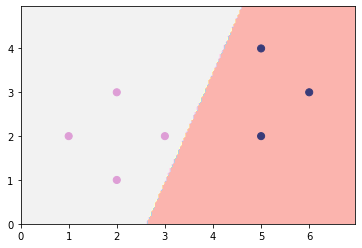

In [16]:
# Vaš kôd ovdje
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

poly = PolynomialFeatures(1)
design_matrix = poly.fit_transform(seven_X)
    

w, w_matrix = lr_train(seven_X, seven_y, trace=True)
print("Weights: " + str(w))
print("Cross entropy error: " + str(cross_entropy_error(design_matrix, seven_y, w)))
plot_2d_clf_problem(seven_X, seven_y, lambda x: sigm(np.sum(w.T * poly.fit_transform(x), axis=1)) >= 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [17]:
from sklearn.metrics import zero_one_loss

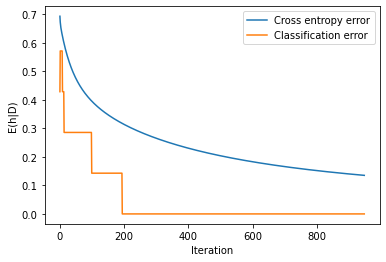

In [18]:
# Vaš kôd ovdje
design_matrix = PolynomialFeatures(1).fit_transform(seven_X)

h_s = np.array([sigm(np.sum(w.T * design_matrix, axis=1)) >= 0.5 for w in w_matrix])
cross_entropy_errors = []
classification_errors = []
for w in w_matrix:
    cross_entropy_errors.append(cross_entropy_error(design_matrix, seven_y, w))
#print(cross_entropy_errors)
for h in h_s:
     classification_errors.append(zero_one_loss(seven_y, h))
#print(classification_errors)
plt.plot(cross_entropy_errors, label="Cross entropy error")
plt.plot(classification_errors, label="Classification error")
plt.xlabel("Iteration")
plt.ylabel("E(h|D)")
plt.legend()
plt.show()

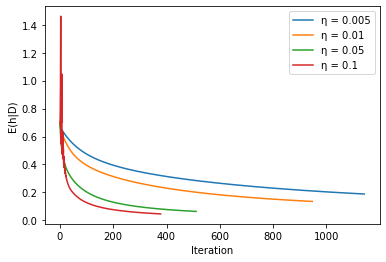

In [19]:
etas = [0.005, 0.01, 0.05, 0.1]
for eta in etas:
    w, w_matrix = lr_train(seven_X, seven_y, eta=eta, trace=True)
    cross_entropy_errors = []
    for w in w_matrix:
        cross_entropy_errors.append(cross_entropy_error(design_matrix, seven_y, w))
    plt.plot(cross_entropy_errors, label="\u03B7 = " + str(eta))
plt.xlabel("Iteration")
plt.ylabel("E(h|D)")
plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

Weights:[ 5.33129609 -1.18244419 -0.30251926]


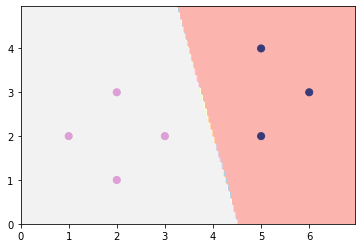

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
# Vaš kôd ovdje
logreg = LogisticRegression().fit(seven_X, seven_y)
w = np.hstack([logreg.intercept_, logreg.coef_[0]])
print("Weights:" + str(w))
plot_2d_clf_problem(seven_X, seven_y, lambda x : logreg.predict(x) >= 0.5)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [21]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Accuracy score for dataset outlier is: 1.0


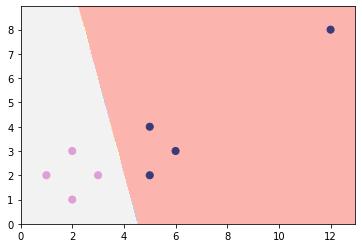

In [22]:
# Vaš kôd ovdje
logreg = LogisticRegression(random_state=0).fit(outlier_X, outlier_y)
pred_outlier_y = logreg.predict(outlier_X)
print("Accuracy score for dataset outlier is: " + str(accuracy_score(outlier_y, pred_outlier_y)))
plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x : logreg.predict(x))

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

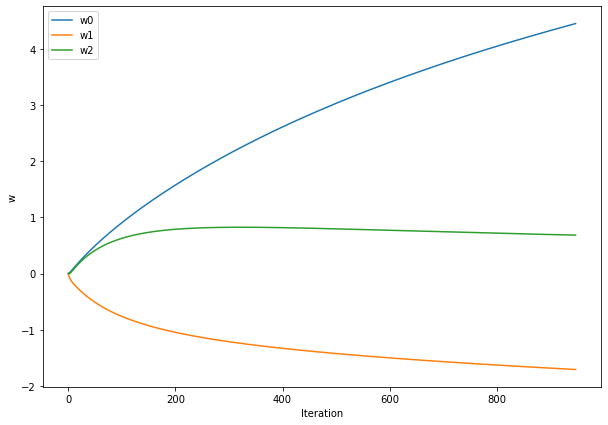

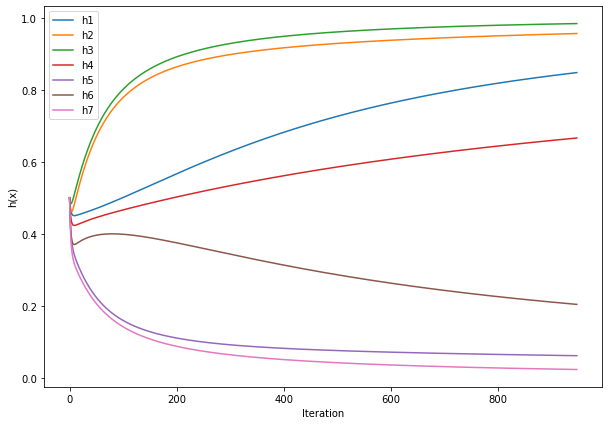

In [23]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
phi = poly.fit_transform(seven_X)

w, w_matrix, h_matrix = lr_train(seven_X, seven_y, trace=True, list_of_h=True)

iterations = len(w_matrix)

w0 = list()
w1 = list()
w2 = list()
for weight in w_matrix:
    w0.append(weight[0])
    w1.append(weight[1])
    w2.append(weight[2])
       

plt.figure(figsize=(10,7)) 
plt.plot(range(iterations), w0, label='w0')
plt.plot(range(iterations), w1, label='w1')
plt.plot(range(iterations), w2, label='w2')
plt.xlabel("Iteration")
plt.ylabel("w")
plt.legend()
plt.show()


plt.figure(figsize=(10,7)) 
h_matrix = np.stack(h_matrix, axis=0).T  
for i in range(h_matrix.shape[0]):
    plt.plot(range(iterations), h_matrix[i], label="h" + str(i+1))
plt.xlabel("Iteration")
plt.ylabel("h(x)")
plt.legend()
plt.show()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [24]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

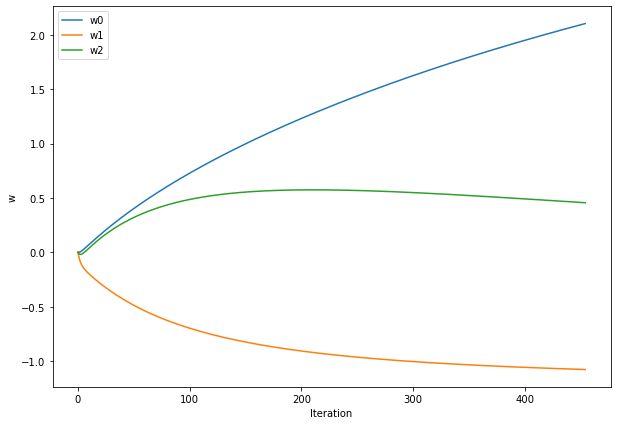

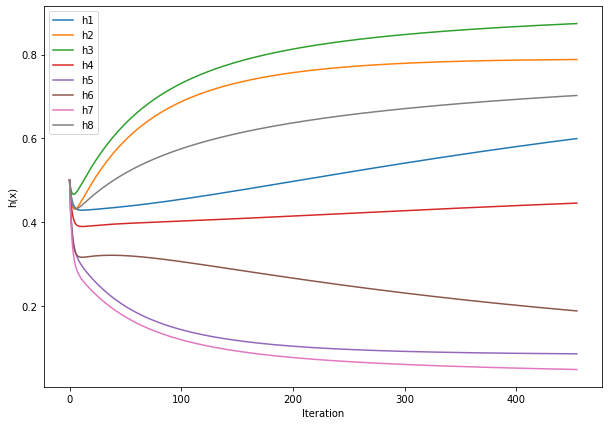

In [25]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
phi = poly.fit_transform(seven_X)

w, w_matrix, h_matrix = lr_train(unsep_X, unsep_y, trace=True, list_of_h=True)

iterations = len(w_matrix)

w0 = list()
w1 = list()
w2 = list()
for weight in w_matrix:
    w0.append(weight[0])
    w1.append(weight[1])
    w2.append(weight[2])
       

plt.figure(figsize=(10,7)) 
plt.plot(range(iterations), w0, label='w0')
plt.plot(range(iterations), w1, label='w1')
plt.plot(range(iterations), w2, label='w2')
plt.xlabel("Iteration")
plt.ylabel("w")
plt.legend()
plt.show()


plt.figure(figsize=(10,7)) 
h_matrix = np.stack(h_matrix, axis=0).T  
for i in range(h_matrix.shape[0]):
    plt.plot(range(iterations), h_matrix[i], label="h" + str(i+1))
plt.xlabel("Iteration")
plt.ylabel("h(x)")
plt.legend()
plt.show()


**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [26]:
from numpy.linalg import norm

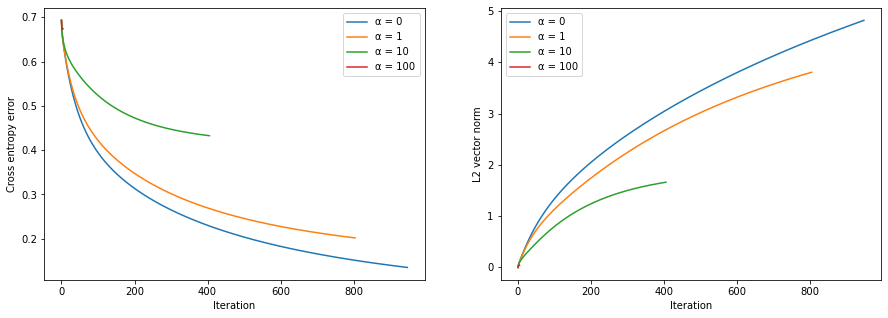

In [27]:
design_matrix = PolynomialFeatures(1).fit_transform(seven_X)
plt.figure(figsize=(15, 5))

alphas = [0,1,10,100]
for alpha in alphas:
    w, w_matrix = lr_train(seven_X, seven_y, trace=True, alpha=alpha)

    cross_entropies = list()
    l2_norms = list()

    for w in w_matrix:
        cross_entropies.append(cross_entropy_error(design_matrix, seven_y, w))
        l2_norms.append(norm(w))
    
    num_of_iterations = len(w_matrix)
    
    plt.subplot(1, 2, 1)
    plt.xlabel("Iteration")
    plt.ylabel("Cross entropy error")
    plt.plot(range(num_of_iterations), cross_entropies, label='\u03B1 = ' + str(alpha))
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(num_of_iterations), l2_norms, label='\u03B1 = ' + str(alpha))
    plt.xlabel("Iteration")
    plt.ylabel("L2 vector norm")
    plt.legend()

    

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [28]:
from sklearn.preprocessing import PolynomialFeatures
#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

In [29]:
from sklearn.datasets import make_classification
# Vaš kôd ovdje
my_X, my_y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

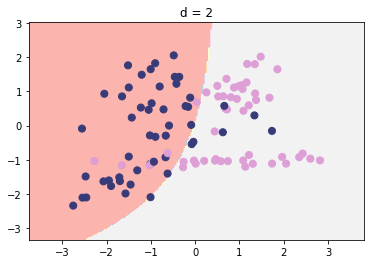

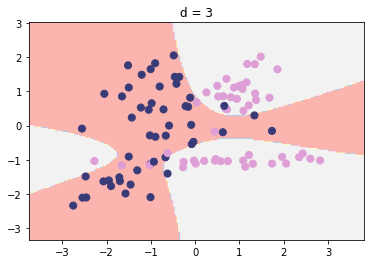

In [30]:
degrees = [2,3]
for degree in degrees:
    poly = PolynomialFeatures(degree)
    design_matrix = poly.fit_transform(my_X)
    logreg = LogisticRegression(C=10).fit(design_matrix, my_y)
    plot_2d_clf_problem(my_X, my_y, lambda x : logreg.predict(poly.transform(x)))
    plt.title("d = " + str(degree))
    plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?